In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.circuit.library import MCMT

from qiskit.visualization import plot_distribution

#import numpy as np


In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)


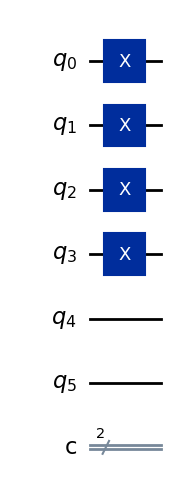

In [3]:
#Definindo numero de registros classicos e quanticos

#initializing  quantum circuit
qc = QuantumCircuit(6, 2)   #N = 6 qubits. N=2 classical bits

#lets start our circuit changing q0, q1, q2, q3 from |0> to |1>

qc.x(0)

qc.x(1)

qc.x(2)

qc.x(3)

qc.draw("mpl")


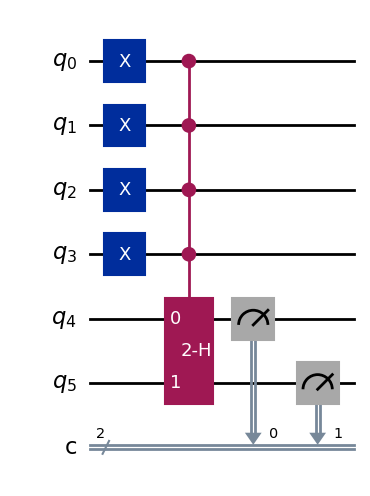

In [4]:
#Aply  MCMT in the circuit

#We use compose to add a circuit qc + MCMT
qc = qc.compose( MCMT('h',4,2)) #MCMT(gate = h = hadamard, num control qubits=4, num target qubits=2) 

qc.measure(4,0)
qc.measure(5,1)

qc.draw("mpl")

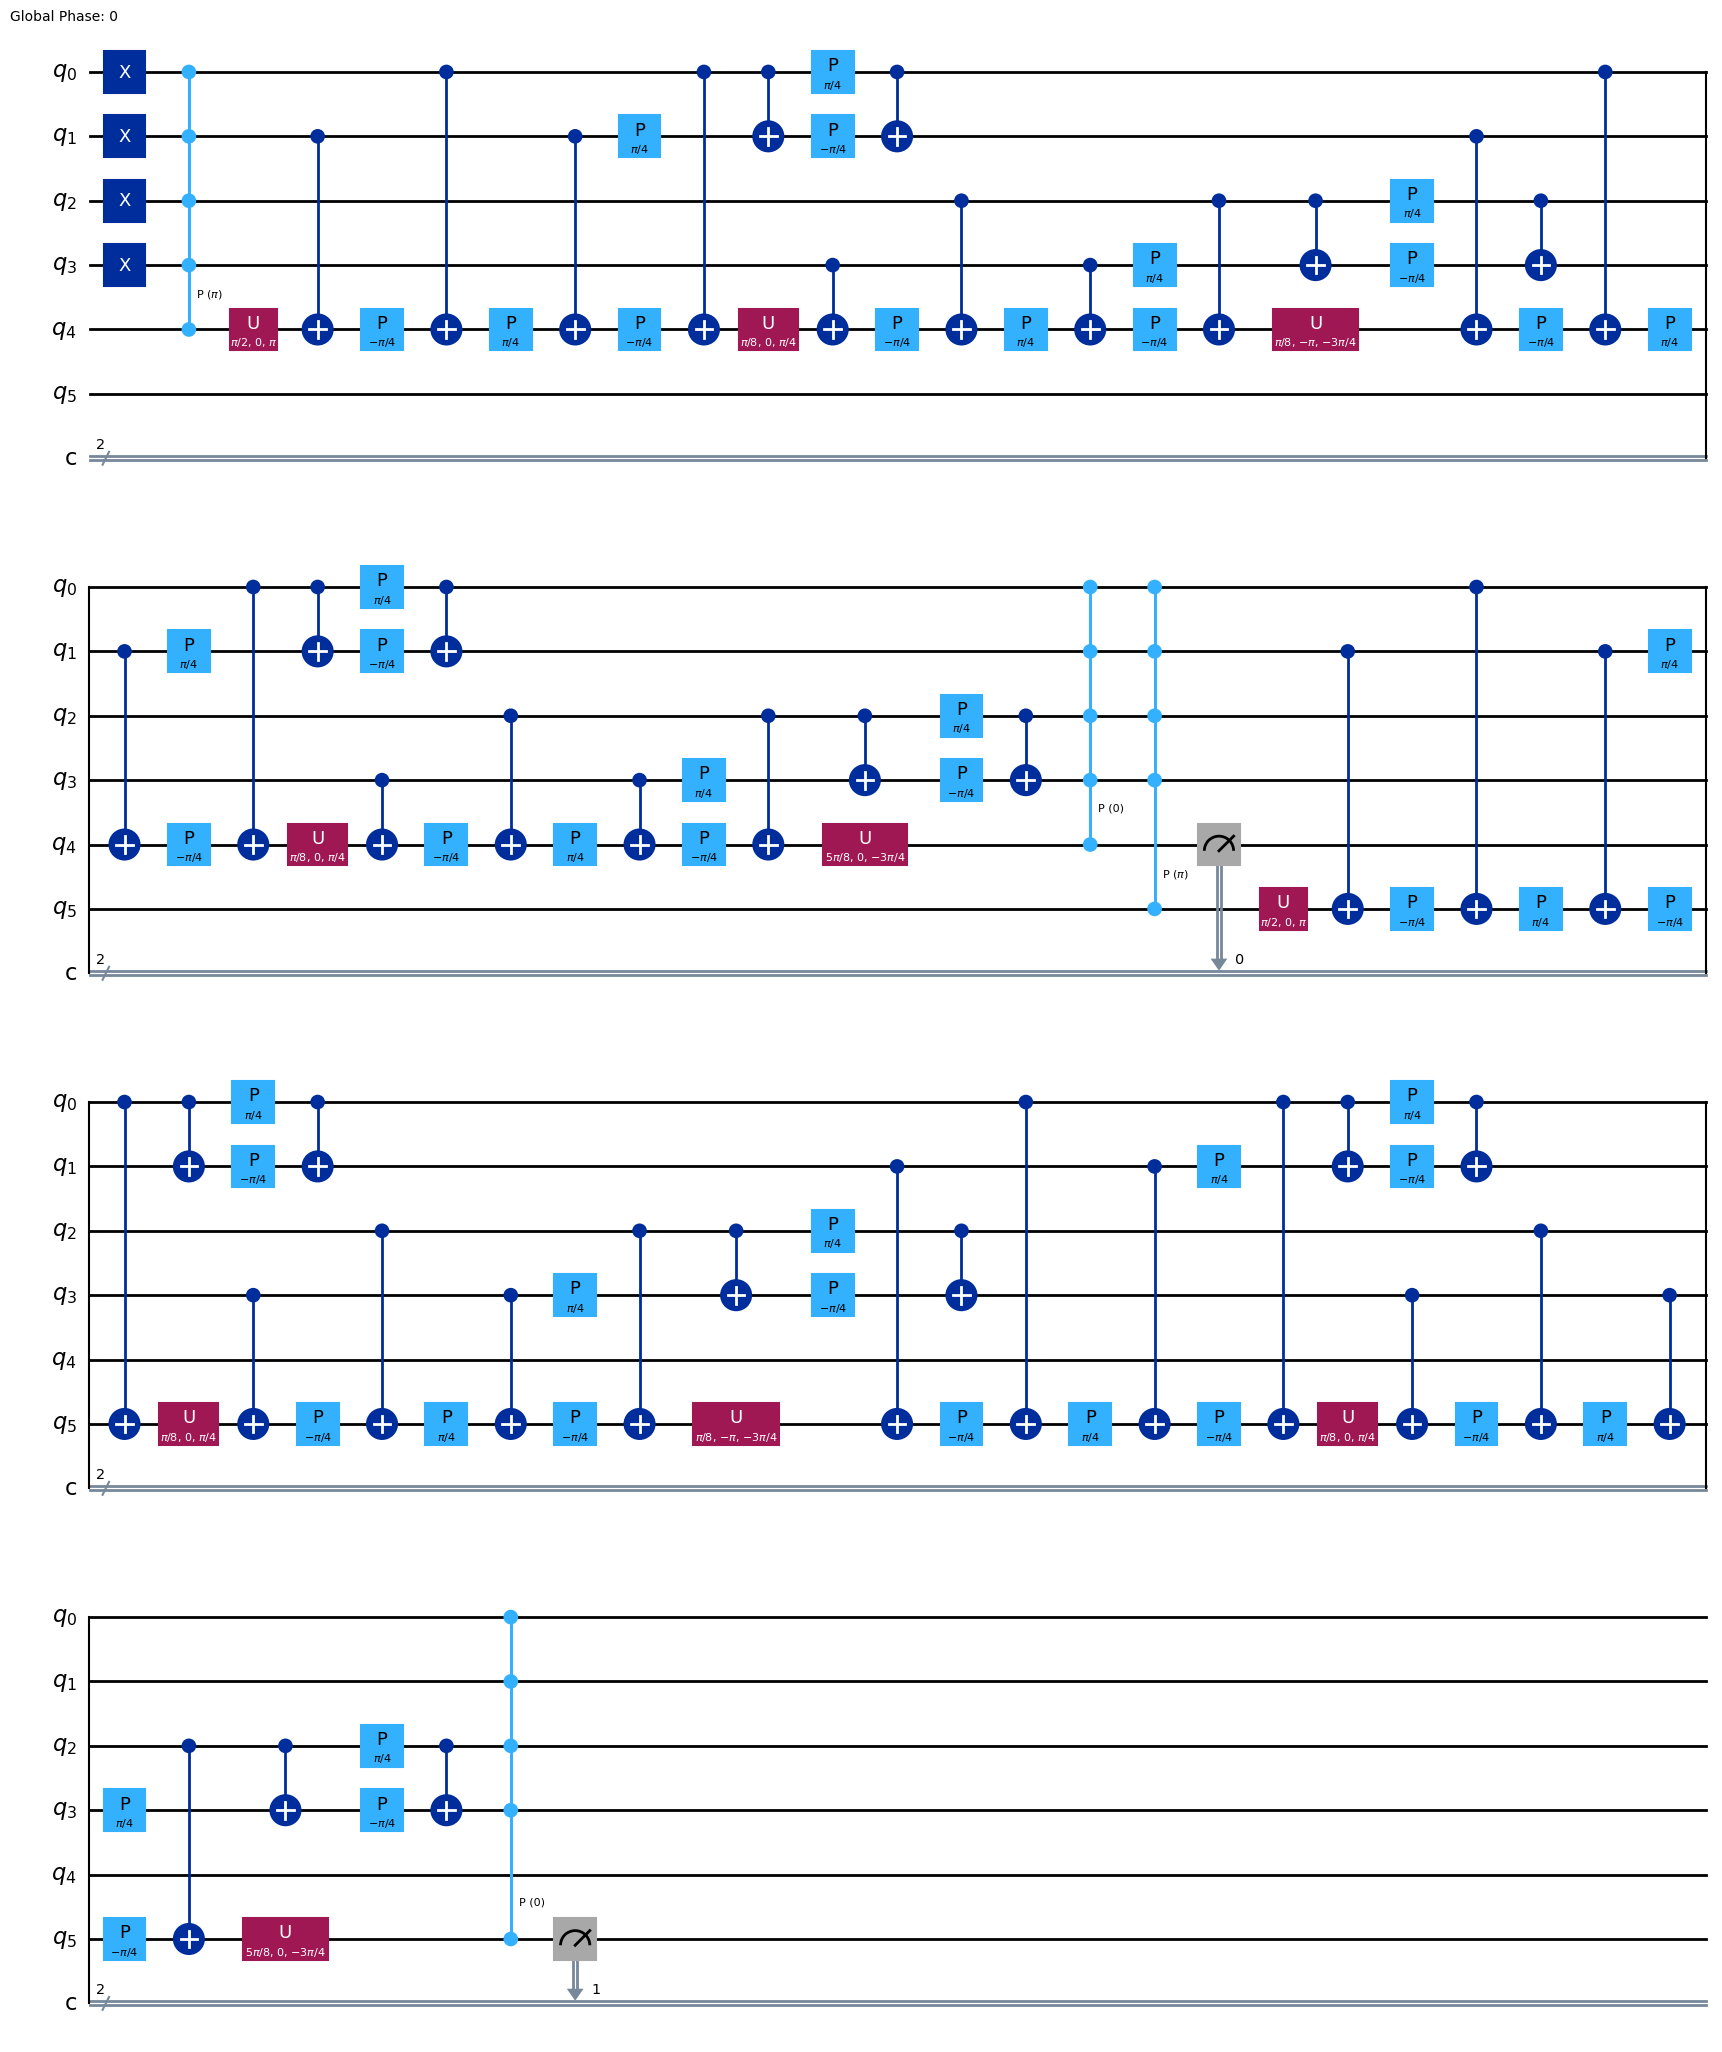

In [5]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")


In [6]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.c.get_counts() #Meassuring results. 
#In this case, measure "c". See circuit  


#counts
print('RESULT ', counts)

RESULT  {'10': 260, '11': 274, '01': 222, '00': 244}


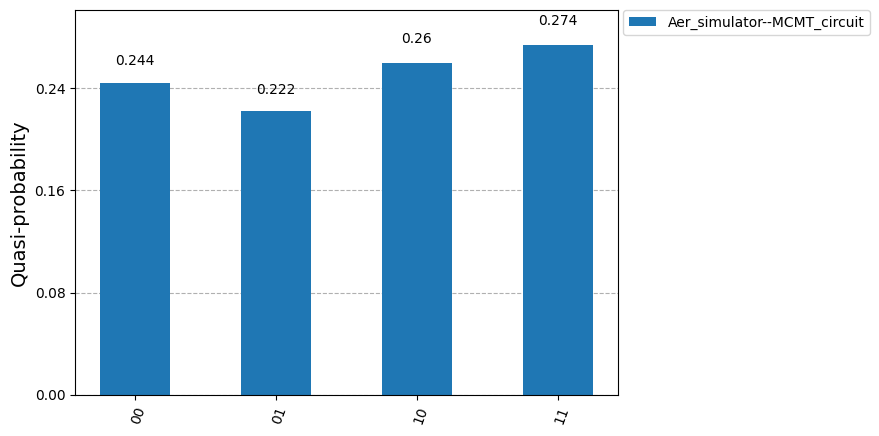

In [7]:
plot_distribution([counts], legend = ['Aer_simulator--MCMT_circuit'])